<a href="https://colab.research.google.com/github/jl749/CJ_VRP/blob/master/JM/final_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import os

drive.mount('/gdrive/', force_remount=True)
PATH = "/gdrive/MyDrive/CJ/2. 택배 배송 데이터/"  # 택배 배송 데이터 PATH
takbe_CSVs = os.listdir(PATH)

takbe_CSVs

Mounted at /gdrive/


['2-1. 택배 배송 데이터.xlsx',
 '2-2. 택배 배송 데이터.xlsx',
 '2-3. 택배 배송 데이터.xlsx',
 '2-4. 택배 배송 데이터.xlsx',
 '2-5. 택배 배송 데이터.xlsx',
 '2-6. 택배 배송 데이터.xlsx',
 '2-7. 택배 배송 데이터.xlsx',
 '2-8. 택배 배송 데이터.xlsx',
 '2-9. 택배 배송 데이터.xlsx',
 '2-10. 택배 배송 데이터.xlsx',
 '2-11. 택배 배송 데이터.xlsx',
 '2-12. 택배 배송 데이터.xlsx',
 '2-13. 택배 배송 데이터.xlsx',
 '2-14. 택배 배송 데이터.xlsx']

In [4]:
import pandas as pd

df1 = pd.read_excel(PATH + takbe_CSVs[0])
df2 = pd.read_excel(PATH + takbe_CSVs[1])
df3 = pd.read_excel(PATH + takbe_CSVs[2])
df4 = pd.read_excel(PATH + takbe_CSVs[3])
df5 = pd.read_excel(PATH + takbe_CSVs[4])
df6 = pd.read_excel(PATH + takbe_CSVs[5])
df7 = pd.read_excel(PATH + takbe_CSVs[6])
df8 = pd.read_excel(PATH + takbe_CSVs[7])
df9 = pd.read_excel(PATH + takbe_CSVs[8])
df10 = pd.read_excel(PATH + takbe_CSVs[9])
df11 = pd.read_excel(PATH + takbe_CSVs[10])
df12 = pd.read_excel(PATH + takbe_CSVs[11])
df13 = pd.read_excel(PATH + takbe_CSVs[12])
df14 = pd.read_excel(PATH + takbe_CSVs[13])

df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])

In [5]:
df_all.head(3)

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
0,0,배달,2021-03-02,2021-03-03,신용,1,5000,Y,190148,2021-03-03,스마트폰,식품,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
1,1,배달,2021-03-02,2021-03-03,선불,1,3500,Y,190149,2021-03-03,스마트폰,식품,57,경기도 화성시 장안면 버들로
2,2,배달,2021-03-01,2021-03-02,신용,1,2500,Y,143956,2021-03-02,스마트폰,식품,57,경기도 화성시 장안면 석포리


In [6]:
df = df_all.drop(['Unnamed: 0', '구분명', '집화일자', '집배일자', '운임명', '집화여부', '집배일자', '장비구분', '품목'], axis=1)

In [7]:
df.head(3)

,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소
0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
1,1,3500,190149,2021-03-03,57,경기도 화성시 장안면 버들로
2,1,2500,143956,2021-03-02,57,경기도 화성시 장안면 석포리


# SM groupby 로 택배 용량 확인

In [8]:
df_SM = df[['SM명', '배달일자', '수량(BOX)', '운임']].groupby(['SM명', '배달일자']).sum()
df_SM['val'] = df_SM['운임'] / df_SM['수량(BOX)']
df_SM

수량(BOX)       운임          val
SM명 배달일자                                     
0   2021-03-02       80   294500  3681.250000
    2021-03-03      553  2056000  3717.902351
    2021-03-04      564  2093000  3710.992908
    2021-03-05      518  1866000  3602.316602
    2021-03-06      397  1445000  3639.798489
...                 ...      ...          ...
282 2021-04-28       23   110500  4804.347826
    2021-05-04        1     5000  5000.000000
    2021-05-11       35   157000  4485.714286
    2021-05-14       48   226500  4718.750000
    2021-05-21       32   160500  5015.625000

[17869 rows x 3 columns]

In [9]:
# df_SM[(0, '2021-03-02')]

In [10]:
df_SM.index

MultiIndex([(  0, '2021-03-02'),
            (  0, '2021-03-03'),
            (  0, '2021-03-04'),
            (  0, '2021-03-05'),
            (  0, '2021-03-06'),
            (  0, '2021-03-08'),
            (  0, '2021-03-09'),
            (  0, '2021-03-10'),
            (  0, '2021-03-11'),
            (  0, '2021-03-12'),
            ...
            (282, '2021-04-16'),
            (282, '2021-04-20'),
            (282, '2021-04-22'),
            (282, '2021-04-26'),
            (282, '2021-04-27'),
            (282, '2021-04-28'),
            (282, '2021-05-04'),
            (282, '2021-05-11'),
            (282, '2021-05-14'),
            (282, '2021-05-21')],
           names=['SM명', '배달일자'], length=17869)

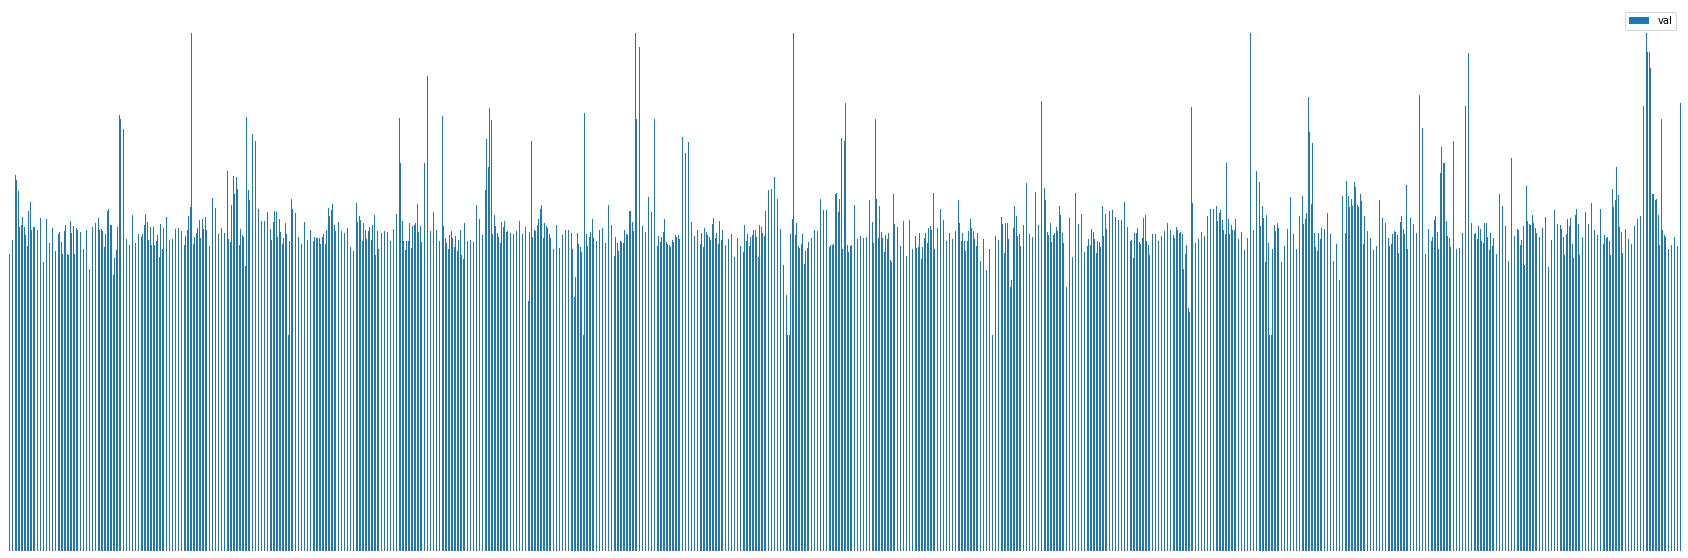

In [11]:
import matplotlib.pyplot as plt

df_SM.plot(figsize=(30,10), kind='bar', y='val')
plt.axis('off')
plt.show()

In [12]:
df.head(3)

,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소
0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
1,1,3500,190149,2021-03-03,57,경기도 화성시 장안면 버들로
2,1,2500,143956,2021-03-02,57,경기도 화성시 장안면 석포리


In [13]:
import re

def if_integer(string):
    if bool(re.search(r'(\d+)\s*-\s*(\d+)', string)) or bool(re.search(r'(\d+)', string)):
        return True
    return False

In [14]:
df = df.dropna(axis = 0)

In [15]:
df = df[df.받는분주소.apply(if_integer)]
df

,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소
0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
3,1,3500,180605,2021-03-04,57,경기도 화성시 장안면 매바위로 347
5,1,3500,175052,2021-03-05,57,경기도 화성시 장안면 버들로 1232-4
7,1,5000,121446,2021-03-08,57,경기 화성시 장안면 무봉길 200-6
8,1,5000,180605,2021-03-04,57,경기도 화성시 장안면 소개무골길 66-10
...,...,...,...,...,...,...
42,1,5000,125225,2021-05-31,157,경기 오산시 오산동 923-2번지 운암대동황토방아파트 황토방아파트
44,1,3500,140930,2021-05-31,177,"경기도 오산시 부산중앙로 11 (부산동, 시티자이 1단지) 시티자이"
45,1,2500,124826,2021-05-31,52,경기도 화성시 봉담읍 상리1길 127 (봉담읍) 이편한세상 신봉담아파트
46,1,2500,91844,2021-05-31,39,경기도 화성시 향남읍 행정동로 22


#사용가능한 주소 추출

In [16]:
def remwithre(text, there=re.compile(re.escape('(')+'.*')):
  return there.sub('', text)

In [17]:
df['받는분주소'] = df['받는분주소'].apply(remwithre)
df

,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소
0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8
3,1,3500,180605,2021-03-04,57,경기도 화성시 장안면 매바위로 347
5,1,3500,175052,2021-03-05,57,경기도 화성시 장안면 버들로 1232-4
7,1,5000,121446,2021-03-08,57,경기 화성시 장안면 무봉길 200-6
8,1,5000,180605,2021-03-04,57,경기도 화성시 장안면 소개무골길 66-10
...,...,...,...,...,...,...
42,1,5000,125225,2021-05-31,157,경기 오산시 오산동 923-2번지 운암대동황토방아파트 황토방아파트
44,1,3500,140930,2021-05-31,177,경기도 오산시 부산중앙로 11
45,1,2500,124826,2021-05-31,52,경기도 화성시 봉담읍 상리1길 127
46,1,2500,91844,2021-05-31,39,경기도 화성시 향남읍 행정동로 22


In [54]:
df.reset_index(inplace=True)
del df['index']

In [ ]:
df

In [43]:
from urllib.parse import quote_plus, urlencode
from urllib.request import urlopen, Request
import json

def jusoAPI(keystr):
  url = 'http://www.juso.go.kr/addrlink/addrLinkApi.do'
  queryParams = '?' + urlencode(
      {quote_plus('currentPage'): '1', quote_plus('countPerPage'): '1', quote_plus('resultType'): 'json',
      quote_plus('keyword'): keystr, quote_plus('confmKey'): 'devU01TX0FVVEgyMDIxMTAwMjIzNDkxMzExMTcxNDg='})
  request = Request(url + queryParams)
  request.get_method = lambda: 'GET'  # default GET anyway
  response_body = urlopen(request).read()

  root_json = json.loads(response_body)
  total = root_json['results']['common']['totalCount']

  if total == '1':
    ad = root_json['results']['juso'][0]
    return ad['jibunAddr'], ad['roadAddr']  # ['detBdNmList']
  else:
    return None

In [46]:
import time

jibun = pd.Series( data = [None] * df.shape[0] )
road = pd.Series( data = [None] * df.shape[0] )

index = 0
for ad in df['받는분주소']:
    tmp = jusoAPI(ad)
    if tmp is not None:
      jibun[index] = tmp[0]
      road[index] = tmp[1]
    else:
      arr = ad.split()
      count = 1
      while len(arr[ : -count]) > 2:
        tmp = jusoAPI(" ".join(arr[ : -count]))
        if tmp is not None:
          jibun[index] = tmp[0]
          road[index] = tmp[1]
          break
        # time.sleep(0.1)
        count += 1
    index += 1

print(jibun)
print(road)

URLError: ignored

In [50]:
jibun[:20], road[:20]

(0     경기도 화성시 장안면 석포리 718-106
 1      경기도 화성시 장안면 석포리 785-14
 2       경기도 화성시 장안면 석포리 334-1
 3      경기도 화성시 장안면 석포리 448-24
 4       경기도 화성시 장안면 석포리 386-3
 5      경기도 화성시 장안면 석포리 614-24
 6         경기도 화성시 장안면 석포리 741
 7      경기도 화성시 장안면 석포리 718-54
 8     경기도 화성시 장안면 석포리 718-116
 9     경기도 화성시 장안면 석포리 718-134
 10      경기도 화성시 장안면 석포리 564-3
 11     경기도 화성시 장안면 석포리 675-15
 12      경기도 화성시 장안면 석포리 675-3
 13      경기도 화성시 장안면 석포리 406-1
 14     경기도 화성시 장안면 석포리 718-12
 15      경기도 화성시 장안면 석포리 614-4
 16      경기도 화성시 장안면 석포리 771-1
 17     경기도 화성시 장안면 석포리 763-17
 18       경기도 화성시 장안면 석포리 59-3
 19    경기도 화성시 장안면 석포리 785-242
 dtype: object, 0         경기도 화성시 장안면 매바위로366번길 8
 1            경기도 화성시 장안면 매바위로 347
 2          경기도 화성시 장안면 버들로 1232-4
 3           경기도 화성시 장안면 무봉길 200-6
 4         경기도 화성시 장안면 소개무골길 66-10
 5          경기도 화성시 장안면 돌서지길 96-27
 6           경기도 화성시 장안면 돌서지길 28-7
 7            경기도 화성시 장안면 매바위로 376
 8     경기도 화성시 장안면 매바위로366번길 68-13
 9        경기도 화성시 장안면 매바위로366번길 25
 10         경기도

In [52]:
df['지번'] = jibun
df['도로명주소'] = road
df

,index,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소,지번,도로명주소
0,0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8,경기도 화성시 장안면 석포리 718-106,경기도 화성시 장안면 매바위로366번길 8
1,3,1,3500,180605,2021-03-04,57,경기도 화성시 장안면 매바위로 347,경기도 화성시 장안면 석포리 785-14,경기도 화성시 장안면 매바위로 347
2,5,1,3500,175052,2021-03-05,57,경기도 화성시 장안면 버들로 1232-4,경기도 화성시 장안면 석포리 334-1,경기도 화성시 장안면 버들로 1232-4
3,7,1,5000,121446,2021-03-08,57,경기 화성시 장안면 무봉길 200-6,경기도 화성시 장안면 석포리 448-24,경기도 화성시 장안면 무봉길 200-6
4,8,1,5000,180605,2021-03-04,57,경기도 화성시 장안면 소개무골길 66-10,경기도 화성시 장안면 석포리 386-3,경기도 화성시 장안면 소개무골길 66-10
...,...,...,...,...,...,...,...,...,...
4037719,42,1,5000,125225,2021-05-31,157,경기 오산시 오산동 923-2번지 운암대동황토방아파트 황토방아파트,None,None
4037720,44,1,3500,140930,2021-05-31,177,경기도 오산시 부산중앙로 11,None,None
4037721,45,1,2500,124826,2021-05-31,52,경기도 화성시 봉담읍 상리1길 127,None,None
4037722,46,1,2500,91844,2021-05-31,39,경기도 화성시 향남읍 행정동로 22,None,None


In [53]:
df.dropna()

,index,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소,지번,도로명주소
0,0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8,경기도 화성시 장안면 석포리 718-106,경기도 화성시 장안면 매바위로366번길 8
1,3,1,3500,180605,2021-03-04,57,경기도 화성시 장안면 매바위로 347,경기도 화성시 장안면 석포리 785-14,경기도 화성시 장안면 매바위로 347
2,5,1,3500,175052,2021-03-05,57,경기도 화성시 장안면 버들로 1232-4,경기도 화성시 장안면 석포리 334-1,경기도 화성시 장안면 버들로 1232-4
3,7,1,5000,121446,2021-03-08,57,경기 화성시 장안면 무봉길 200-6,경기도 화성시 장안면 석포리 448-24,경기도 화성시 장안면 무봉길 200-6
4,8,1,5000,180605,2021-03-04,57,경기도 화성시 장안면 소개무골길 66-10,경기도 화성시 장안면 석포리 386-3,경기도 화성시 장안면 소개무골길 66-10
...,...,...,...,...,...,...,...,...,...
503,887,1,6000,175052,2021-03-05,57,경기도 화성시 장안면 소개무골길 66-10,경기도 화성시 장안면 석포리 763-17,경기도 화성시 장안면 석포로 330-7
504,888,1,3500,210152,2021-03-03,57,경기도 화성시 장안면 석포로 115-26,경기도 화성시 장안면 석포리 108-2,경기도 화성시 장안면 버들로 1056
505,889,1,5000,201624,2021-03-05,57,경기도 화성시 장안면 석포로 87-9,경기도 화성시 장안면 석포리 675-3,경기도 화성시 장안면 돌서지길 144
506,890,1,6000,191503,2021-03-04,57,경기 화성시 장안면 석포로108번길 13 SR산업,경기도 화성시 장안면 석포리 134-4,경기도 화성시 장안면 버들로 1063


In [ ]:
df.to_excel("address_PREPROCESSED.xlsx")